# 01 Scraping & Exploration

This notebook performs an initial exploration of raw reviews collected from the Google Play Store for Ethiopian banks. It covers loading the dataset, checking for missing values, examining the distribution of ratings and review lengths, and inspecting sample reviews from each bank. The purpose is to understand the structure and quality of the data, identify patterns or anomalies, and prepare for subsequent cleaning, preprocessing, and sentiment analysis steps.


Total reviews: 1266
bank
DASHEN    432
BOA       430
CBE       404
Name: count, dtype: int64
bank      0
review    0
rating    0
date      0
source    0
dtype: int64


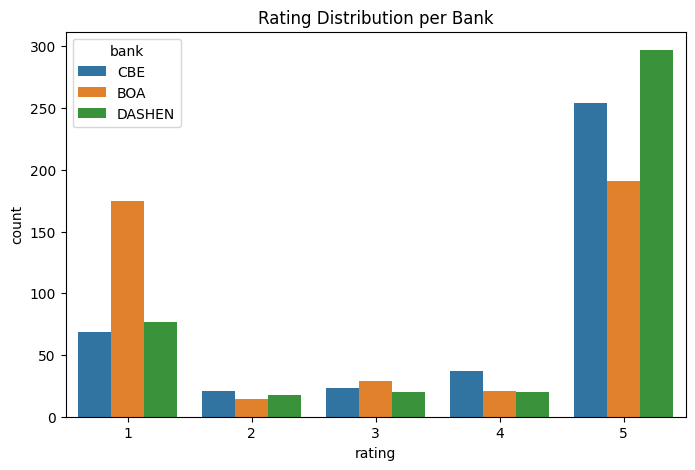

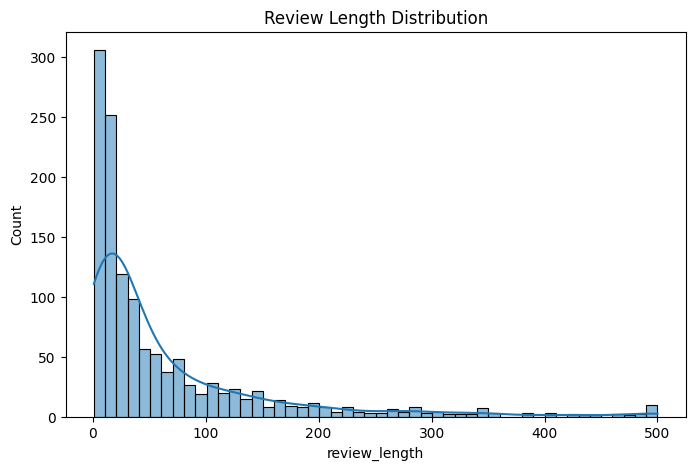


Sample review from CBE:
I don't Like this app and there service fee is highl

Sample review from BOA:
❤❤❤❤❤❤

Sample review from DASHEN:
A proudly Ethiopia innovation that delivers beyond expectations. The marketplace feature is a big win for local shoppers bnd sellers


In [5]:
# 01_scraping_exploration.ipynb

# Markdown Cell
# # 01 Scraping & Exploration
# Explore raw reviews collected from Google Play Store for Ethiopian banks.

# Code Cell
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Add project path to import config
sys.path.append(r"E:\10 academy\weak2\fintech-review-analytics")
from config.config import RAW_CSV_PATH

# Load raw reviews
df = pd.read_csv(RAW_CSV_PATH)
df.head()

# Markdown Cell
# ## Quick Stats

# Code Cell
# Number of reviews
print(f"Total reviews: {len(df)}")

# Reviews per bank
print(df['bank'].value_counts())

# Check missing values
print(df.isna().sum())

# Markdown Cell
# ## Ratings Distribution

# Code Cell
plt.figure(figsize=(8,5))
sns.countplot(x='rating', hue='bank', data=df)
plt.title('Rating Distribution per Bank')
plt.show()

# Markdown Cell
# ## Text Length Analysis

# Code Cell
df['review_length'] = df['review'].astype(str).apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.show()

# Markdown Cell
# ## Sample Reviews

# Code Cell
for bank in df['bank'].unique():
    print(f"\nSample review from {bank}:")
    sample = df[df['bank']==bank]['review'].sample(1).values[0]
    print(sample)
